In [2]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

># **Efecto Zeeman para $B$ débil:**

In [3]:
data_path = Path("data")
weak_zeeman = data_path / Path("weak_zeeman.xlsx")
wz_data = pd.read_excel(weak_zeeman)
wz_freq = wz_data["Freq (kHz)"].to_numpy()
wz_Rb85 = wz_data["Rb85 (A)"].to_numpy()
wz_Rb87 = wz_data["Rb87 (A)"].to_numpy() 

In [4]:
m_Rb85, b_Rb85 = np.polyfit(wz_Rb85, wz_freq, 1)
m_Rb87, b_Rb87 = np.polyfit(wz_Rb87, wz_freq, 1)
x_Rb85 = np.linspace(wz_Rb85[0], wz_Rb85[-1], 100)
x_Rb87 = np.linspace(wz_Rb87[0], wz_Rb87[-1], 100)
y_Rb85 = m_Rb85*x_Rb85 + b_Rb85
y_Rb87 = m_Rb87*x_Rb87 + b_Rb87
m_Rb87/m_Rb85

np.float64(1.4834807170247761)

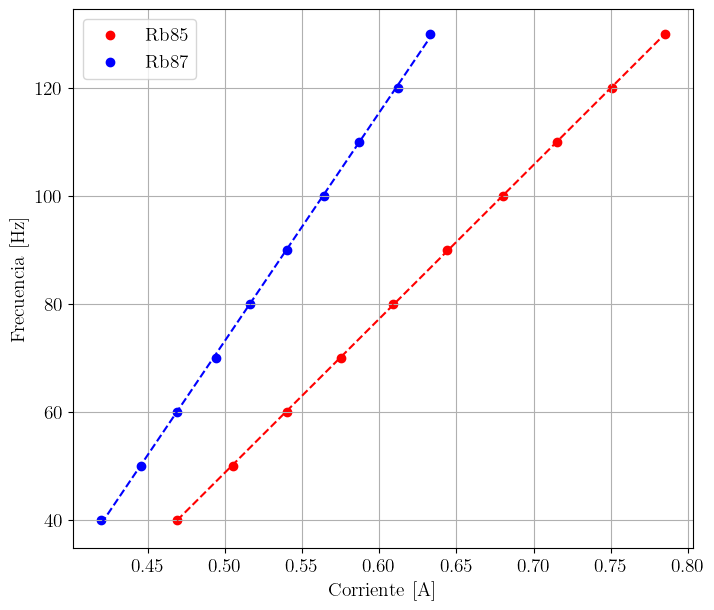

In [5]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(wz_Rb85, wz_freq, label = "Rb85", color = "red")
ax.plot(x_Rb85, y_Rb85, color = "red", linestyle = "--")

ax.scatter(wz_Rb87, wz_freq, label = "Rb87", color = "blue")
ax.plot(x_Rb87, y_Rb87, color = "blue", linestyle = "--")
ax.set_ylabel("Frecuencia [Hz]")
ax.set_xlabel("Corriente [A]")
ax.legend()
ax.grid()

># **Transición a $B = 0$:**

In [6]:
zero_field = data_path / Path("zero_field.xlsx")
zf_data = pd.read_excel(zero_field)
zf_time = zf_data["time"].to_numpy()
zf_CH1 = zf_data["channel 1"].to_numpy()
zf_CH2 = zf_data["channel 2"].to_numpy() 

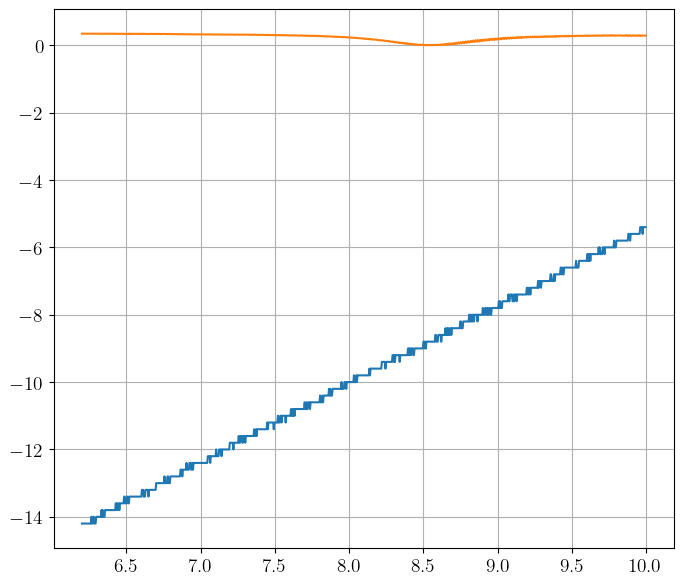

In [7]:
fig, ax = plt.subplots(figsize=(8,7))
step = 1550
ax.plot(zf_time[step:], zf_CH1[step:])
ax.plot(zf_time[step:], zf_CH2[step:])
ax.grid()

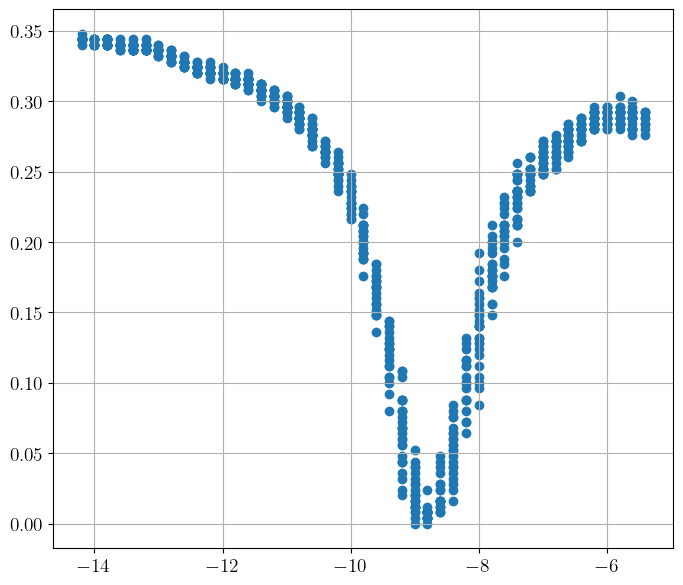

In [8]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(zf_CH1[step:], zf_CH2[step:])
ax.grid()

># **Oscilaciones de Rabi:**

In [17]:
rabi_oscillations = data_path / Path("rabi_oscillations.xlsx")
rabi_data = pd.read_excel(rabi_oscillations)
rabi_time = rabi_data["Period"].to_numpy()
rabi_vpp = rabi_data["Vpp"].to_numpy()

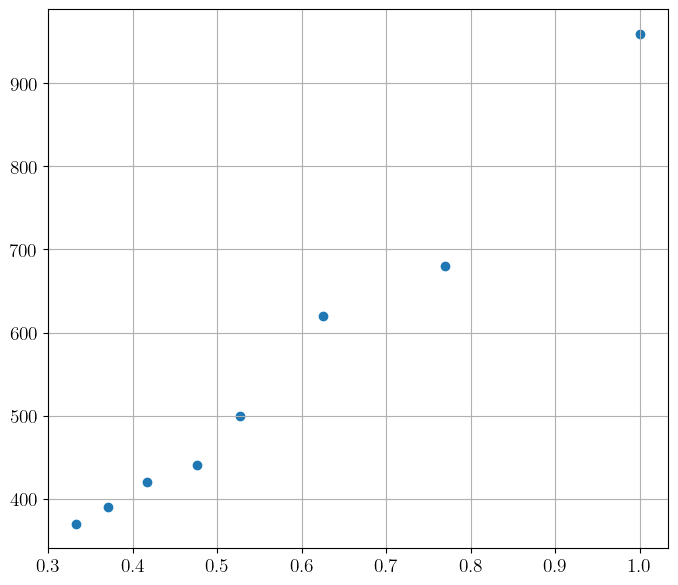

In [18]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(1/rabi_vpp, rabi_time)
ax.grid()

In [34]:
rabi = data_path / Path("rabi_3v.xlsx")
rabiG_data = pd.read_excel(rabi)
rG_time = rabiG_data["time"].to_numpy()
rG_CH1 = rabiG_data["channel 1"].to_numpy()
rG_CH2 = rabiG_data["channel 2"].to_numpy() 

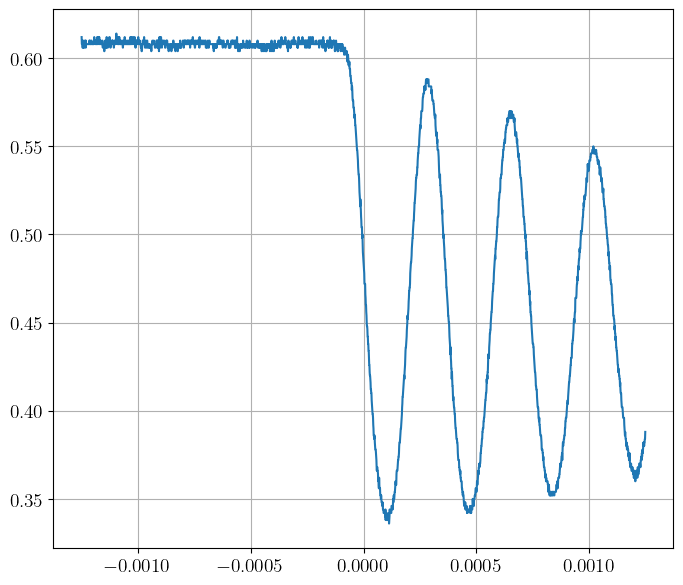

In [39]:
fig, ax = plt.subplots(figsize=(8,7))
step = 0
rG_len = len(rG_time)
ax.plot(rG_time[step:rG_len - step], rG_CH2[step:rG_len - step])
ax.grid()

># **Efecto Zeeman Cuadrático:**

In [19]:
quad_zeeman = data_path / Path("quad_zeeman.xlsx")
qz_data = pd.read_excel(quad_zeeman)
qz_time = qz_data["time"].to_numpy()
qz_CH1 = qz_data["channel 1"].to_numpy()
qz_CH2 = qz_data["channel 2"].to_numpy() 

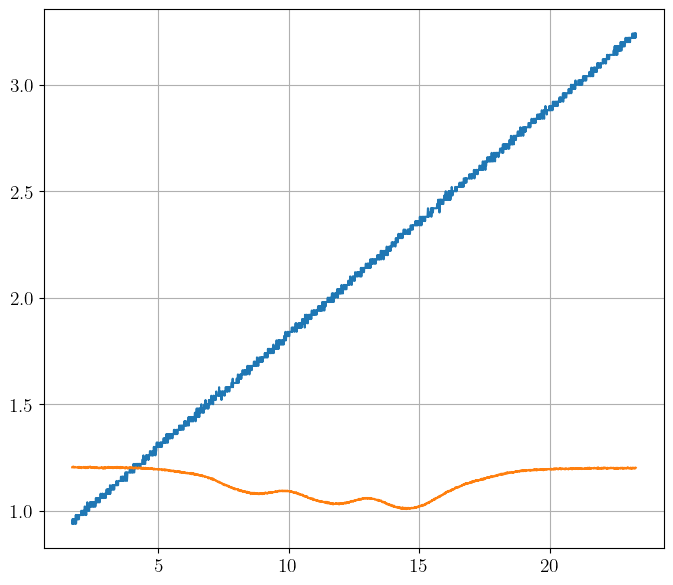

In [25]:
fig, ax = plt.subplots(figsize=(8,7))
step = 170
gz_len = len(qz_time)
ax.plot(qz_time[step:gz_len - step], qz_CH1[step:gz_len - step])
ax.plot(qz_time[step:gz_len - step], qz_CH2[step:gz_len - step])
ax.grid()

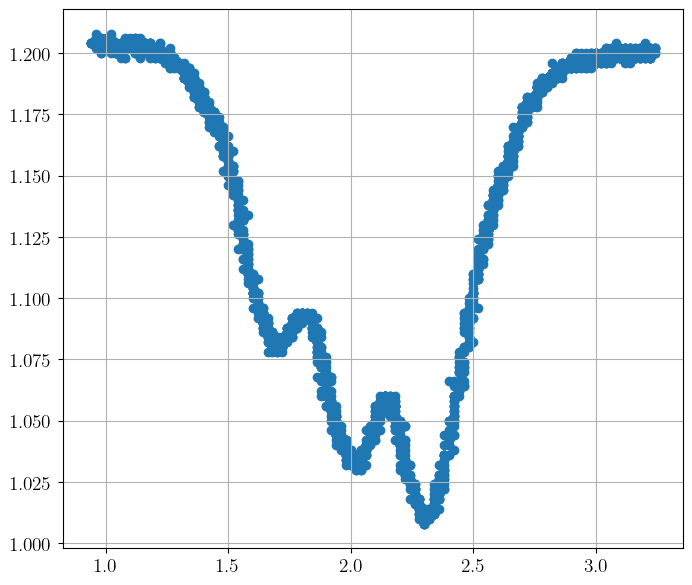

In [28]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(qz_CH1[step:gz_len - step], qz_CH2[step:gz_len - step])
ax.grid()